In [1]:
import cv2
import torch
from PIL import Image
from transformers import BlipProcessor, BlipForConditionalGeneration
import matplotlib.pyplot as plt
import os
%matplotlib inline

print("라이브러리 임포트 완료")

c:\Users\SEONGBEEN\.conda\envs\oss\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


라이브러리 임포트 완료


In [2]:
# BLIP 모델 초기화
try:
    processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
    model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")

    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)
except Exception as e:
    print(f"모델 초기화 중 오류 발생 : {str(e)}")
    raise
else:
    print(f"모델 로딩 완료. 사용 중인 디바이스: {device}")

c:\Users\SEONGBEEN\.conda\envs\oss\lib\site-packages\huggingface_hub\file_download.py:797: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


모델 로딩 완료. 사용 중인 디바이스: cpu


In [3]:
def generate_caption(image_path):
    try:
        #이미지 경로 확인
        if not os.path.exists(image_path):
            return "이미지 파일이 존재하지 않습니다."
    
        # 이미지 읽기
        img = cv2.imread(image_path)
        if img is None:
            return "이미지를 읽을 수 없습니다."
    
        # BGR to RGB 변환
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
        # PIL Image로 변환
        pil_image = Image.fromarray(img_rgb)
    
        # 이미지 처리 및 캡션 생성
        inputs = processor(pil_image, return_tensors="pt").to(device)
        output = model.generate(**inputs, max_length=50)
        caption = processor.decode(output[0], skip_special_tokens=True)
    
        try:
            # 결과 시각화
            plt.figure(figsize=(10, 8))
            plt.imshow(img_rgb)
            plt.axis('off')
            plt.title(caption)
            plt.show()
        except Exception as e:
            print(f"시각화 중 오류 발생: {str(e)}")
            return caption
        
    except Exception as e:
        return f"캡션 생성 중 오류 발생: {str(e)}"
    
    return caption

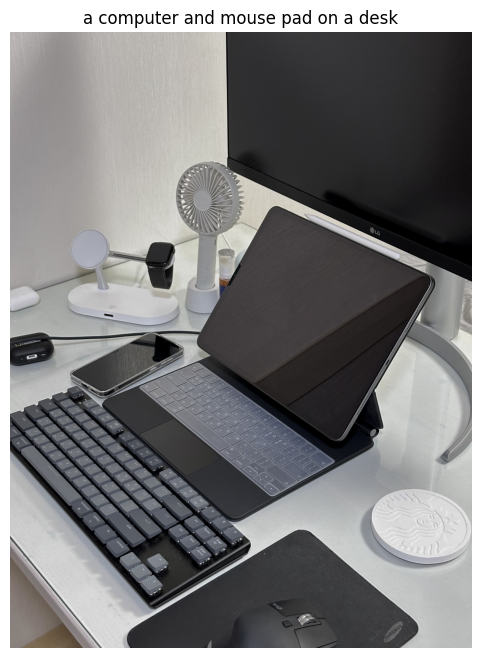

"image.jpg"에서 생성된 캡션: a computer and mouse pad on a desk


In [ ]:
# 테스트 이미지로 실행
base_path = "./images/"
file_name = input("이미지 폴더 안에 있는 사진 중 불러오고 싶은 사진의 파일명을 입력하세요")
file_path = base_path + file_name
caption = generate_caption(file_path)
print(f"\"{file_name}\"에서 생성된 캡션 : {caption}")